In [33]:
from google.colab import drive
drive.mount('/content/drive')
print("Drive mounted")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive mounted


In [34]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Dynamic pricing /retail_store_inventory.csv')
print("File loaded")

File loaded


In [35]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [36]:
df.tail()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring
73099,2024-01-01,S005,P0020,Groceries,East,117,6,165,2.33,78.39,20,Rainy,1,79.52,Spring


In [37]:
df.shape

(73100, 15)

In [38]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [39]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [40]:
df.isnull().sum()

,0
Date,0
Store ID,0
Product ID,0
Category,0
Region,0
Inventory Level,0
Units Sold,0
Units Ordered,0
Demand Forecast,0
Price,0


In [41]:
print("Duplicates before:", df.duplicated().sum())

Duplicates before: 0


In [42]:
df.dtypes

,0
Date,object
Store ID,object
Product ID,object
Category,object
Region,object
Inventory Level,int64
Units Sold,int64
Units Ordered,int64
Demand Forecast,float64
Price,float64


In [43]:
# Converting object into date time type for date column
df['Date'] = pd.to_datetime(df['Date'])

In [44]:
df.dtypes

,0
Date,datetime64[ns]
Store ID,object
Product ID,object
Category,object
Region,object
Inventory Level,int64
Units Sold,int64
Units Ordered,int64
Demand Forecast,float64
Price,float64


In [45]:
categorical_cols = ['Category', 'Region', 'Seasonality']
for col in categorical_cols:
    print(col, df[col].unique())

Category ['Groceries' 'Toys' 'Electronics' 'Furniture' 'Clothing']
Region ['North' 'South' 'West' 'East']
Seasonality ['Autumn' 'Summer' 'Winter' 'Spring']


Check and Handle Outliers

In [46]:
numeric_cols = ['Units Sold', 'Inventory Level', 'Price', 'Competitor Pricing']

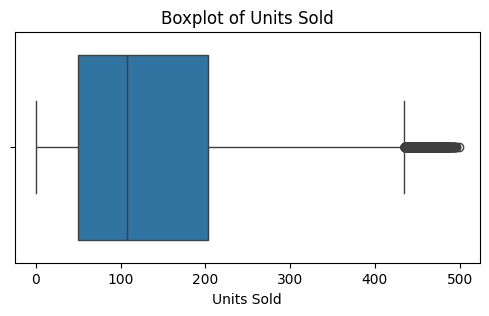

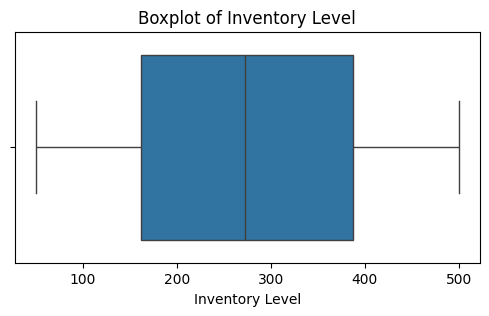

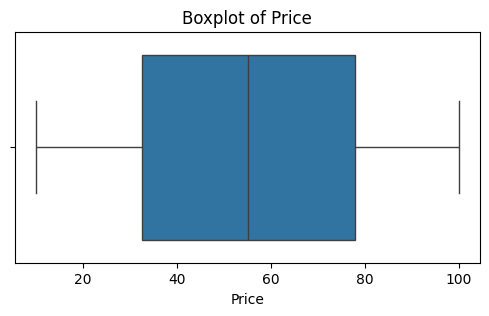

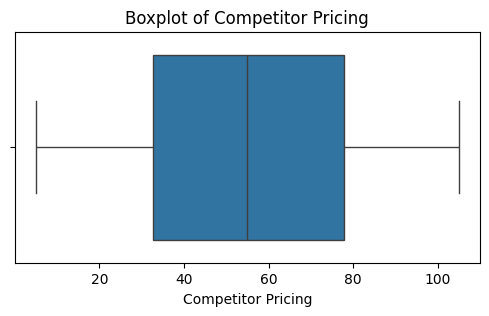

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [48]:
for col in numeric_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)

In [49]:
for col in numeric_cols:
    print(f"{col} min: {df[col].min()}, max: {df[col].max()}")

Units Sold min: 1, max: 434
Inventory Level min: 55, max: 496
Price min: 10.89, max: 99.11
Competitor Pricing min: 9.18, max: 100.8


In [50]:
invalid_sales = df[df['Units Sold'] > df['Inventory Level']]
print("Rows where Units Sold > Inventory Level:", len(invalid_sales))

Rows where Units Sold > Inventory Level: 0


In [51]:
# Check invalid prices
invalid_prices = df[df['Price'] <= 0]
print("Rows with non-positive Price:", len(invalid_prices))

Rows with non-positive Price: 0


In [52]:
invalid_discount = df[~df['Discount'].between(0, 100)]
print("Rows with invalid Discount:", len(invalid_discount))

Rows with invalid Discount: 0


In [53]:
invalid_competitor_price = df[df['Competitor Pricing'] <= 0]
print("Rows with invalid Competitor Pricing:", len(invalid_competitor_price))

Rows with invalid Competitor Pricing: 0


In [54]:
df = df.sort_values(['Store ID','Product ID','Date'])
duplicates = df.duplicated(subset=['Store ID','Product ID','Date']).sum()
print("Duplicate rows by Store, Product, Date:", duplicates)

Duplicate rows by Store, Product, Date: 0


In [55]:
df['Revenue'] = df['Units Sold'] * df['Price']
df['Discounted_Price'] = df['Price'] * (1 - df['Discount']/100)

In [56]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Revenue,Discounted_Price
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn,4254.50,26.800
100,2022-01-02,S001,P0001,Groceries,West,116,81,104,92.94,27.95,10,Cloudy,0,30.89,Spring,2263.95,25.155
200,2022-01-03,S001,P0001,Electronics,West,154,5,189,5.36,62.70,20,Rainy,0,58.22,Winter,313.50,50.160
300,2022-01-04,S001,P0001,Groceries,South,85,58,193,52.87,77.88,15,Cloudy,1,75.99,Winter,4517.04,66.198
400,2022-01-05,S001,P0001,Groceries,South,238,147,37,150.27,28.46,20,Sunny,1,29.40,Winter,4183.62,22.768


In [57]:
df.to_csv('Cleaned_Retail_Store_Inventory.csv', index=False)